In [ ]:
%pip install flaml[notebook]==1.0.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 205 kB 5.1 MB/s 
     |████████████████████████████████| 2.0 MB 25.4 MB/s 
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
     |████████████████████████████████| 757 kB 55.1 MB/s 
     |████████████████████████████████| 158 kB 65.6 MB/s 
     |████████████████████████████████| 121 kB 52.5 MB/s 
     |████████████████████████████████| 1.6 MB 50.2 MB/s 
     |████████████████████████████████| 83 kB 1.8 MB/s 
  Created wheel for openml: filename=openml-0.10.2-py3-none-any.whl size=190340 sha256=fba4aea7010ea020f347a27d1718472ac77037626a7a0fdfcb086d43d35ac7d7
  Stored in directory: /root/.cache/pip/wheels/9c/9e/f3/6a5ebf16527d7fe22d9bc1652bc9beb5dc9fcfdeb75e805400
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11730 sha256=b67fe48b7c55ee26fc23d32aff5d36cbb9e9deb69c18f9989a4859f4a0927fb9
  Stored in directory: /r

In [ ]:
from flaml.data import load_openml_dataset
X_train, X_test, y_train, y_test = load_openml_dataset(dataset_id=44031, data_dir='./')
print("Data type:", type(X_train), type(y_train))
print("The first 5 rows of X_train:")
print(X_train.head())
print("The first 5 rows of y_train:")
print(y_train.head())

download dataset from openml


/usr/local/lib/python3.7/dist-packages/openml/_api_calls.py:105: UserWarning: Received uncompressed content from OpenML for https://api.openml.org/data/v1/download/22103119/california.arff.
  .format(url))
DEBUG:openml.datasets.dataset:Saved dataset 44031: california to file /root/.openml/cache/org/openml/www/datasets/44031/dataset.pkl.py3


Dataset name: california
X_train.shape: (15480, 8), y_train.shape: (15480,);
X_test.shape: (5160, 8), y_test.shape: (5160,)
Data type: <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
The first 5 rows of X_train:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
19226  7.3003      19.0  7.961600   1.137600      1926.0  3.081600     38.46   
14549  5.9547      18.0  6.547325   1.102881       547.0  2.251029     32.95   
9093   3.2125      19.0  5.207547   1.216981       314.0  2.962264     34.68   
12213  6.9930      13.0  6.428571   1.000000       120.0  2.857143     33.51   
12765  2.5162      21.0  4.429348   1.036685      1735.0  2.357337     38.62   

       Longitude  
19226    -122.68  
14549    -117.24  
9093     -118.27  
12213    -117.18  
12765    -121.41  
The first 5 rows of y_train:
19226    1.571321
14549    1.456986
9093     1.048722
12213    1.791761
12765    0.680568
Name: price, dtype: float64


In [ ]:
from flaml import AutoML
automl = AutoML()

In [ ]:
settings = {
    "time_budget": 300,  # total running time in seconds
    "metric": 'r2',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
                           # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "estimator_list": ['xgboost', 'lgbm', 'catboost', 'rf'],
    "task": 'regression',  # task type
    "log_file_name": 'houses.log',  # flaml log file
    "seed": 423874,    # random seed
}

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
automl.fit(X_train, y_train, **settings)

[flaml.automl: 11-10 19:00:08] {2540} INFO - task = regression
INFO:flaml.automl:task = regression
[flaml.automl: 11-10 19:00:09] {2542} INFO - Data split method: uniform
INFO:flaml.automl:Data split method: uniform
[flaml.automl: 11-10 19:00:09] {2545} INFO - Evaluation method: cv
INFO:flaml.automl:Evaluation method: cv
[flaml.automl: 11-10 19:00:09] {2664} INFO - Minimizing error metric: 1-r2
INFO:flaml.automl:Minimizing error metric: 1-r2
[flaml.automl: 11-10 19:00:09] {2806} INFO - List of ML learners in AutoML Run: ['xgboost', 'lgbm', 'catboost', 'rf']
INFO:flaml.automl:List of ML learners in AutoML Run: ['xgboost', 'lgbm', 'catboost', 'rf']
[flaml.automl: 11-10 19:00:09] {3108} INFO - iteration 0, current learner xgboost
INFO:flaml.automl:iteration 0, current learner xgboost
[flaml.automl: 11-10 19:00:09] {3242} INFO - Estimated sufficient time budget=6130s. Estimated necessary time budget=8s.
INFO:flaml.automl:Estimated sufficient time budget=6130s. Estimated necessary time budg

In [ ]:
#automl.fit(X_train=x_train, y_train=y_train, **settings)

In [ ]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 398, 'num_leaves': 89, 'min_child_samples': 81, 'learning_rate': 0.11638978786387756, 'log_max_bin': 7, 'colsample_bytree': 0.875183151668791, 'reg_alpha': 0.06441369344589583, 'reg_lambda': 103.883235206324}
Best r2 accuracy on validation data: 0.8569
Training duration of best run: 1.534 s


<BarContainer object of 8 artists>

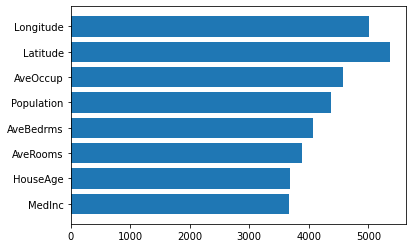

In [ ]:
import matplotlib.pyplot as plt
plt.barh(automl.feature_names_in_, automl.feature_importances_)

In [ ]:
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
#y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels [0.83486448 1.25240202 0.92585458 ... 1.04302382 1.12821845 1.31258268]
True labels 14740    0.862468
10101    1.227592
20566    1.100943
2670     0.545227
15709    1.722767
           ...   
13132    0.793897
8228     0.864997
3948     0.958967
8522     1.185707
16798    1.296370
Name: price, Length: 5160, dtype: float64


In [ ]:
#import numpy as np
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#label_encoder = label_encoder.fit(y_pred)
#y_pred = label_encoder.transform(y_pred)
#label_encoder_test = label_encoder.fit(y_test)
#y_test = label_encoder_test.transform(y_test)
#y_pred_proba = np.argmax(y_pred_proba, axis=0) 
#y_train = float(y_train)

In [ ]:
from flaml.ml import sklearn_metric_loss_score
#print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.8647471133422999
mse = 0.01714366249372399
mae = 0.09077562791836823


In [ ]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'xgboost', 'Current Sample': 15480, 'Current Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'xgboost', 'Best Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 15480, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.0

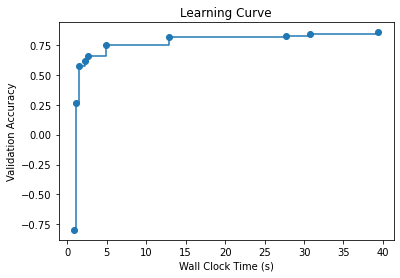

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
Y_train = label_encoder.transform(y_train)

In [ ]:
lgbm.fit(X_train, Y_train)

LGBMClassifier()

In [ ]:
y_pred_lgbm = lgbm.predict(X_test)

In [ ]:
#from xgboost import XGBClassifier
#xgb = XGBClassifier()
#cat_columns = X_train.select_dtypes(include=['category']).columns
#X = X_train.copy()
#X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#label_encoder = label_encoder.fit(y_train)
#y_train = label_encoder.transform(y_train)

In [ ]:
#xgb.fit(X, y_train)

In [ ]:
#X = X_test.copy()
##X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
#y_pred_xgb = xgb.predict(X)

In [ ]:
#y_test = [float(x) for x in np.array(y_test)]
#y_pred_lgbm = [float(x) for x in np.array(y_pred_lgbm)]
#y_pred = [float(x) for x in np.array(y_pred)]
#print (y_pred_lgbm)
label_encoder = LabelEncoder()
label_encoder_ytest = label_encoder.fit(y_test)
Y_test = label_encoder_ytest.transform(y_test)

In [ ]:
#from catboost import CatBoostClassifier
#cat = CatBoostClassifier()

In [ ]:
#cat.fit(X_train, y_train)

In [ ]:
#y_pred_cat = cat.predict(X_test)

In [ ]:
#print('default xgboost accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred_xgb, Y_test))
print('default lgbm accuracy', '=', 1 - sklearn_metric_loss_score('r2', y_pred_lgbm, Y_test))
#print('default catboost accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred_cat, Y_test))
print('flaml (5 min) r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

default lgbm accuracy = -1.3042519058160065
flaml (5 min) r2 = -25132016.474995118
r2 = -25132016.474995118
mse = 3185549.9429605766
mae = 1534.908478832173


In [ ]:
%pip install optuna==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.1)
import optuna.integration.lightgbm as lgb
dtrain = lgb.Dataset(train_x, label=train_y)
dval = lgb.Dataset(val_x, label=val_y)
params = {
    "objective": "regression",
    "metric": "regression",
    "verbosity": -1,
}

In [ ]:
%%time
model = lgb.train(params, dtrain, valid_sets=[dtrain, dval], verbose_eval=10000) 

[I 2022-11-10 19:32:05,448] A new study created in memory with name: no-name-c8cd7215-8b0a-4f8a-9cf0-0e5a36b55c45
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
bagging, val_score: 145402.173901: 100%|##########| 10/10 [00:33<00:00,  3.38s/it]
feature_fraction_stage2, val_score: 145402.173901:  17%|#6        | 1/6 [00:02<00:11,  2.25s/it][I 2022-11-10 19:34:46,089] Trial 37 finished with value: 152540.8565157757 and parameters: {'feature_fraction': 0.9799999999999999}. Best is trial 37 with value: 152540.8565157757.
feature_fraction_stage2, val_score: 145402.173901:  33%|###3      | 2/6 [00:04<00:08,  2.22s/it][I 2022-11-10 1

CPU times: user 6min 41s, sys: 9.94 s, total: 6min 51s
Wall time: 3min 49s


In [ ]:
y_pred = model.predict(X_test)
from flaml.ml import sklearn_metric_loss_score
print('Optuna LightGBM Tuner r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, Y_test))

Optuna LightGBM Tuner r2 = 0.3306821760581846


In [ ]:
#predict = automl.predict(X_test)
#predict = [float(x) for x in np.array(predict)]
#from sklearn.metrics import classification_report
#print(classification_report(y_test, predict))

In [ ]:
import pickle
with open('house_regression.pkl', 'wb') as b:
    pickle.dump(automl, b, pickle.HIGHEST_PROTOCOL)